<a href="https://colab.research.google.com/github/Ru1chi/Feynn_Labs/blob/main/task_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [9]:
df.swaplevel(0,0,axis = 1).sort_index(axis = 1,level=0)

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [16]:
df.stack(level=0).unstack(0).sort_index(level=0).swaplevel(axis=1).swaplevel(axis=0).sort_index(level=0)

<ipython-input-16-d7ffbf921420>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.stack(level=0).unstack(0).sort_index(level=0).swaplevel(axis=1).swaplevel(axis=0).sort_index(level=0)


cse         ece      cse      ece
            avg_package avg_package students students
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

In [5]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [6]:
confirm=confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='no of cases')[['Country/Region','no of cases']]


In [7]:
deaths=deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='no of death')[['Country/Region','no of death']]

In [ ]:
df_new=confirm.merge(deaths,on='Country/Region')

In [ ]:
df("deatch_percentage")=(df['no of death']/df['no of cases'])*100

In [ ]:
max_death=df.iloc[df['deatch_percentage'].idxmax()]
MAX_DEATH

In [28]:
import pandas as pd

In [34]:
city=pd.read_csv("/content/List of most-polluted cities by particulate matter concentration - List of most-polluted cities by particulate matter concentration.csv")
city

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
495,495,496,Poland,Lublin,2016,27,>75%,31,>75%,2018
496,496,497,Poland,Siedlce,2016,27,>75%,29,>75%,2018
497,497,498,Poland,Trzebinia,2016,27,>75%,35,>75%,2018
498,498,499,El Salvador,San Salvador,2016,27,50% -< 75%,59,NaN,2018


In [37]:
multi_index = pd.MultiIndex.from_frame(city[['Country', 'City/Town']])


In [38]:
multi_index_df = city.set_index(multi_index)


In [39]:
multi_index_df = multi_index_df.drop(columns=['Country', 'City/Town'])


In [40]:
multi_index_df

Unnamed: 0  Position  Year  PM2.5 Temporal coverage  \
Country     City/Town                                                           
India       Kanpur                 0         1  2016    173              >75%   
            Faridabad              1         2  2016    172              >75%   
            Gaya                   2         3  2016    149        50% -< 75%   
            Varanasi               3         4  2016    146              >75%   
            Patna                  4         5  2016    144              >75%   
...                              ...       ...   ...    ...               ...   
Poland      Lublin               495       496  2016     27              >75%   
            Siedlce              496       497  2016     27              >75%   
            Trzebinia            497       498  2016     27              >75%   
El Salvador San Salvador         498       499  2016     27        50% -< 75%   
Turkey      Sivas                499       500  2016     27              >75%   

                          PM10 Temporal coverage.1  Database version (year)  
Country     City/Town                                                        
India       Kanpur         319                 NaN                     2018  
            Faridabad      316                 NaN                     2018  
            Gaya           275                 NaN                     2018  
            Varanasi       260                 NaN                     2018  
            Patna          266                 NaN                     2018  
...                        ...                 ...                      ...  
Poland      Lublin          31                >75%                     2018  
            Siedlce         29                >75%                     2018  
            Trzebinia       35                >75%                     2018  
El Salvador San Salvador    59                 NaN                     2018  
Turkey      Sivas           56                >75%                     2018  

[500 rows x 8 columns]

In [46]:
multi_index_df.loc['India'].sort_values(by='PM10',ascending=False)['PM10'].head(1)

,PM10
City/Town,
Kanpur,319


In [50]:
multi_index_df.loc['India']['PM10'].sort_values().head(1)

,PM10
City/Town,
Aizawl,44


In [51]:
multi_index_df.loc['China']['PM10'].sort_values().head(1)

,PM10
City/Town,
Anshun,38


In [52]:
multi_index_df.loc['China'].sort_values(by='PM10',ascending=False)['PM10'].head(1)

,PM10
City/Town,
Jinan,192


<Axes: ylabel='PM10'>

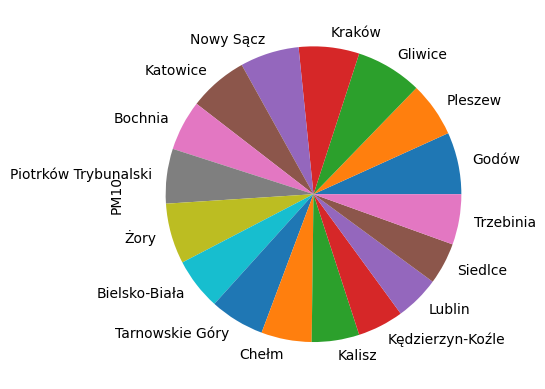

In [55]:
multi_index_df.loc['Poland']['PM10'].plot(kind='pie')

<Axes: xlabel='Country,City/Town'>

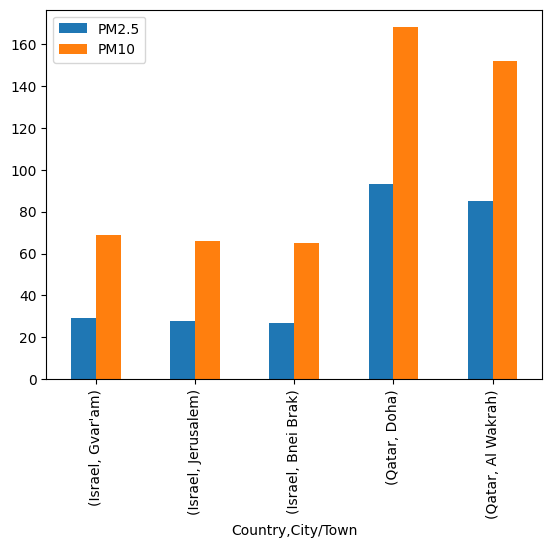

In [58]:
multi_index_df.loc[['Israel','Qatar']][['PM2.5','PM10']].plot(kind='bar')